# Keras Tutorials

### Setting table

In [287]:
import os


class ModelManager(object):
    """
    Parameters

    current_directory
    model_name
    allow_training
    overwrite
    """

    def __init__(
        self,
        current_directory,
        model_name,
        allow_training=False,
        overwrite=False,
    ):
        self.current_directory = current_directory
        self.model_name = str(model_name) + ".h5"
        self.allow_training = allow_training
        self.overwrite = overwrite

    def get_model_name(self):
        return self.model_name

    def enable_training(self):
        self.allow_training = True

    def disable_training(self):
        self.allow_training = False

    def is_trainable(self):
        return self.allow_training

    def is_overwriteable(self):
        return self.overwrite
    
    def enable_overwrite(self):
        self.overwrite = True

    def disable_overwrite(self):
        self.overwrite = False

    def already_exist_model(self):
        return os.path.isfile(os.path.join(self.current_directory, self.model_name))
    
    def get_load_location(self):
        return self.current_directory
    
    def get_load_model(self):
        return os.path.join(self.current_directory, self.model_name)

In [288]:
import os

CURRENT_DIRECTORY = os.getcwd()

# Reopen Jupyter Notebook after change the parameter
USE_GPU = False
ENABLE_ALL_TRAINING = False
ENABLE_ALL_OVERWRITE = False

# Retrain options (each training require a setting parameter)
model1 = ModelManager(current_directory=CURRENT_DIRECTORY, model_name="medical_trial_model")
model2 = ModelManager(current_directory=CURRENT_DIRECTORY, model_name="vgg16_cats_and_dogs_model")
model3 = ModelManager(current_directory=CURRENT_DIRECTORY, model_name="diy_cats_and_dogs_model")
model4 = ModelManager(current_directory=CURRENT_DIRECTORY, model_name="sign_language_digits")

if ENABLE_ALL_TRAINING:
    model1.enable_training()
    model2.enable_training()
    model3.enable_training()
    model4.enable_training()

elif not ENABLE_ALL_TRAINING:
    model1.disable_training()
    model2.disable_training()
    model3.disable_training()
    model4.disable_training()

if ENABLE_ALL_OVERWRITE:
    model1.enable_overwrite()
    model2.enable_overwrite()
    model3.enable_overwrite()
    model4.enable_overwrite()

elif not ENABLE_ALL_OVERWRITE:
    model1.disable_overwrite()
    model2.disable_overwrite()
    model3.disable_overwrite()
    model4.disable_overwrite()

model4.enable_training()
model4.enable_overwrite()

In [289]:
# Sample snippet code for model.fit

"""

# TAG: MODELFIT
from tensorflow.keras.models import load_model

if model1.already_exist_model():
    model = load_model(model1.get_load_model())
else:
    if model1.is_trainable():
        model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)
    if model1.is_overwriteable():
        model.save(os.path.join(model1.get_load_location(), model1.get_model_name()))

"""

'\n\n# TAG: MODELFIT\nfrom tensorflow.keras.models import load_model\n\nif model1.already_exist_model():\n    model = load_model(model1.get_load_model())\nelse:\n    if model1.is_trainable():\n        model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)\n    if model1.is_overwriteable():\n        model.save(os.path.join(model1.get_load_location(), model1.get_model_name()))\n\n'

### Check whether GPU is available

In [290]:
# Check for GPU availability
import tensorflow as tf
print(len(tf.config.experimental.list_physical_devices('GPU')) > 0)

True


### Choose CPU / CPU to run (change USE_GPU parameter)

In [291]:
if USE_GPU:
    physical_devices = tf.config.experimental.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    tf.config.set_visible_devices([], 'GPU')

## Generate data

In [292]:
import numpy as np
import random
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [293]:
train_labels = []
train_samples = []

### Example data:
- An experimental drug was tested on individuals from ages 13 to 100 in a clinical trial.
- The trial had 2100 participants. Half were under 65 years old, half were 65 years or older.
- Around 95% of patients 65 or older experienced side effects.
- Around 95% of patients under 65 experienced no side effects.

In [294]:
random.seed(0)

for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [295]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

In [296]:
train_samples

array([37, 91, 15, ..., 91, 17, 99])

In [297]:
train_labels

array([1, 0, 1, ..., 1, 0, 1])

In [298]:
train_samples, train_labels = shuffle(train_samples, train_labels)

In [299]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

In [300]:
scaled_train_samples

array([[0.29885057],
       [0.93103448],
       [0.33333333],
       ...,
       [0.24137931],
       [0.2183908 ],
       [0.28735632]])

## Simple tf.keras Sequential Model

In [301]:
# For building models
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense

# For training models
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

## Build the Model

In [302]:
model = Sequential([
    Dense(name="Layer_2", units=16, input_shape=(1,), activation="relu"), # The first hidden layer (the second layover overall)
    Dense(name="Layer_3", units=32, activation="relu"),
    Dense(name="Layer_4", units=2, activation="softmax")
])

In [303]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_2 (Dense)             (None, 16)                32        
                                                                 
 Layer_3 (Dense)             (None, 32)                544       
                                                                 
 Layer_4 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [304]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [305]:
# TAG: MODELFIT
from tensorflow.keras.models import load_model

if model1.already_exist_model():
    model = load_model(model1.get_load_model())
else:
    if model1.is_trainable():
        model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)
    if model1.is_overwriteable():
        model.save(os.path.join(model1.get_load_location(), model1.get_model_name()))

In [306]:
import os.path

SAVE_FILE_NAME = "medical_trial_model"

SAVE_FILE_NAME += ".h5"

model.save(os.path.join(os.getcwd(), SAVE_FILE_NAME))

In [307]:
os.getcwd()

'D:\\DATA SCIENCE\\GIT\\DS\\Keras_Tutorial'

## Preprocess Test Data

In [308]:
test_labels = []
test_samples = []

In [309]:
random.seed(101)

for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The ~95% of older individuals who experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

In [310]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_samples, test_labels = shuffle(test_samples, test_labels)

In [311]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

## Predict

In [312]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [313]:
predictions

array([[0.42465973, 0.5753402 ],
       [0.42465973, 0.5753402 ],
       [0.0774849 , 0.9225151 ],
       ...,
       [0.93964136, 0.06035867],
       [0.94134736, 0.0586527 ],
       [0.93401355, 0.06598651]], dtype=float32)

In [314]:
rounded_predictions = np.argmax(predictions, axis=1)

## Confusion matrix

In [315]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [316]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [317]:
def plot_confusion_matrix(
    cm, classes, percentiles=False, 
        normalize=False, title="Confusion matrix", cmap=plt.cm.Blues
):
    """
    This function prints and plots the confusion matrix.
    Nomralization can be applied by setting "normalize=True"
    """

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    threshold = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
        )
        plt.tight_layout()
        plt.ylabel("True Labels")
        plt.xlabel("Predicted Labels")

Confusion matrix, without normalization
[[ 963   87]
 [  47 1003]]


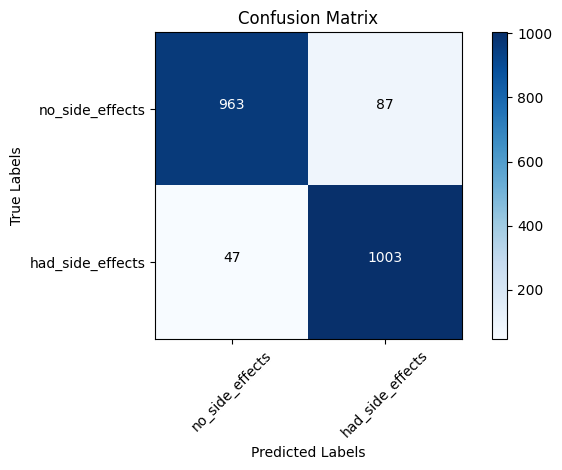

In [318]:
cm_plot_labels = ["no_side_effects", "had_side_effects"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

## Save and Load a model

In [319]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_2 (Dense)             (None, 16)                32        
                                                                 
 Layer_3 (Dense)             (None, 32)                544       
                                                                 
 Layer_4 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 1. model.save()

In [320]:
# Check first to see if file exists already.
# If not, the model is saved to disk.
import os.path

SAVE_FILE_NAME = "medical_trial_model"
SAVE_FILE_NAME += ".h5"

if os.path.isfile(os.path.join(os.getcwd(), SAVE_FILE_NAME)):
    model.save(os.path.join(os.getcwd(), SAVE_FILE_NAME))

This function saves:
- The architecture of the model, allowing to re-create the model.
- The weights of the model.
- The training configuration (loss, optimizer)
- The state of the optimizer, allowing to resume training exactly where you left off.

In [321]:
os.path.join(os.getcwd(), SAVE_FILE_NAME)

'D:\\DATA SCIENCE\\GIT\\DS\\Keras_Tutorial\\medical_trial_model.h5'

In [322]:
from tensorflow.keras.models import load_model

LOAD_FILE_NAME = SAVE_FILE_NAME
new_model = load_model(os.path.join(os.getcwd(), LOAD_FILE_NAME))

In [323]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_2 (Dense)             (None, 16)                32        
                                                                 
 Layer_3 (Dense)             (None, 32)                544       
                                                                 
 Layer_4 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [324]:
new_model.get_weights()

[array([[ 0.6408952 , -0.3049085 , -0.2938841 , -0.09668538, -0.26987582,
          0.76773745,  0.52051175,  0.3543068 , -0.23860714, -0.04333514,
         -0.38872713, -0.38354716, -0.5350459 ,  0.5875342 , -0.4644678 ,
         -0.30706018]], dtype=float32),
 array([ 0.30109242,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.18409441, -0.14231999, -0.04316185,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.15796474,  0.        ,
         0.        ], dtype=float32),
 array([[-0.31446573,  0.42634755,  0.07512923, -0.32785064,  0.00864204,
         -0.08431655, -0.21712008,  0.1460946 ,  0.33648077, -0.08749685,
          0.28225532,  0.29652464, -0.17465785, -0.28288576, -0.06458846,
          0.07424061,  0.21336806,  0.21620782, -0.3224559 ,  0.314619  ,
         -0.18960923,  0.28238872,  0.04535048, -0.24220344, -0.33399203,
          0.10617217,  0.2120955 , -0.3018756 , -0.27582422,  0.27108723,
         -0.16527794, -0.00440906],
 

In [325]:
new_model.optimizer

### 2. model.to_json()

If you only need to save the architecture of a model, and not its weights or its training configuration, you can use the following function to save the architecture only.

In [326]:
# save as JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()

In [327]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "Layer_2_input"}}, {"class_name": "Dense", "config": {"name": "Layer_2", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "Layer_3", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "

In [328]:
# model reconstruction from JSON
from tensorflow.keras.models import model_from_json

model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from tensorflow.keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [329]:
model_architecture.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_2 (Dense)             (None, 16)                32        
                                                                 
 Layer_3 (Dense)             (None, 32)                544       
                                                                 
 Layer_4 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 3. model.save_weights()

In [330]:
# Check first to see if file exists already
# If not,  the weights are saved to disk.
import os.path
if os.path.isfile(os.path.join(os.getcwd(), LOAD_FILE_NAME)) is False:
    model.save_weights(os.path.join(os.getcwd(), LOAD_FILE_NAME))

In [331]:
model_2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation="relu"),
    Dense(units=2, activation="softmax"),
])

In [332]:
model_2.load_weights(os.path.join(os.getcwd(), LOAD_FILE_NAME))

In [333]:
model_2.get_weights()

[array([[ 0.6408952 , -0.3049085 , -0.2938841 , -0.09668538, -0.26987582,
          0.76773745,  0.52051175,  0.3543068 , -0.23860714, -0.04333514,
         -0.38872713, -0.38354716, -0.5350459 ,  0.5875342 , -0.4644678 ,
         -0.30706018]], dtype=float32),
 array([ 0.30109242,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.18409441, -0.14231999, -0.04316185,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.15796474,  0.        ,
         0.        ], dtype=float32),
 array([[-0.31446573,  0.42634755,  0.07512923, -0.32785064,  0.00864204,
         -0.08431655, -0.21712008,  0.1460946 ,  0.33648077, -0.08749685,
          0.28225532,  0.29652464, -0.17465785, -0.28288576, -0.06458846,
          0.07424061,  0.21336806,  0.21620782, -0.3224559 ,  0.314619  ,
         -0.18960923,  0.28238872,  0.04535048, -0.24220344, -0.33399203,
          0.10617217,  0.2120955 , -0.3018756 , -0.27582422,  0.27108723,
         -0.16527794, -0.00440906],
 

## Convolutional Neural Networks

In [334]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline

#### Data preparation

The images included in the data/cats_and_dogs directory are a random subset of the full cat and dog dataset from the following Kaggle competition: http://www.kaggle.com/c/dogs-vs-cats/data

In [335]:
DATASET_FULL_PATH = "D:\DATA SCIENCE\CLOUD\DATASETS\cats_and_dogs\SANDBOX"

DATASET_TRAIN_CAT_PATH = "train/cat"
DATASET_TRAIN_DOG_PATH = "train/dog"
DATASET_VALID_CAT_PATH = "valid/cat"
DATASET_VALID_DOG_PATH = "valid/dog"
DATASET_TEST_CAT_PATH = "test/cat"
DATASET_TEST_DOG_PATH = "test/dog"

In [336]:
# Organize data into train, valid and test dirs
import os
import random
import glob
import shutil

os.chdir(DATASET_FULL_PATH)

if os.path.isdir(DATASET_TRAIN_CAT_PATH) is False:
    os.makedirs(DATASET_TRAIN_CAT_PATH)
    os.makedirs(DATASET_TRAIN_DOG_PATH)
    os.makedirs(DATASET_VALID_CAT_PATH)
    os.makedirs(DATASET_VALID_DOG_PATH)
    os.makedirs(DATASET_TEST_CAT_PATH)
    os.makedirs(DATASET_TEST_DOG_PATH)

    for c in random.sample(glob.glob("cat*"), 500):
        shutil.move(c, DATASET_TRAIN_CAT_PATH)
    for c in random.sample(glob.glob("dog*"), 500):
        shutil.move(c, DATASET_TRAIN_DOG_PATH)
    for c in random.sample(glob.glob("cat*"), 100):
        shutil.move(c, DATASET_VALID_CAT_PATH)
    for c in random.sample(glob.glob("dog*"), 100):
        shutil.move(c, DATASET_VALID_DOG_PATH)
    for c in random.sample(glob.glob("cat*"), 50):
        shutil.move(c, DATASET_TEST_CAT_PATH)
    for c in random.sample(glob.glob("dog*"), 50):
        shutil.move(c, DATASET_TEST_DOG_PATH)

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'D:\\DATA SCIENCE\\CLOUD\\DATASETS\\cats_and_dogs\\SANDBOX'

In [ ]:
DATASET_FULL_PATH

'D:\\DATA SCIENCE\\CLOUD\\DATASETS\\cats_and_dogs\\TRAIN_SANDBOX'

In [ ]:
os.chdir(DATASET_FULL_PATH)
TRAIN_PATH = "train"
VALID_PATH = "valid"
TEST_PATH = "test"

In [ ]:
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
).flow_from_directory(
    directory=TRAIN_PATH, target_size=(224, 224), classes=["cat", "dog"], batch_size=10
)

valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
).flow_from_directory(
    directory=VALID_PATH, target_size=(224, 224), classes=["cat", "dog"], batch_size=10
)

test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
).flow_from_directory(
    directory=TEST_PATH,
    target_size=(224, 224),
    classes=["cat", "dog"],
    batch_size=10,
    shuffle=False,
)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
imgs, labels = next(train_batches)

In [ ]:
# Each batch contains 10 records
print("Size of imgs: " + str(len(imgs))) 
print("Size of labels: " + str(len(labels)))

Size of imgs: 10
Size of labels: 10


In [ ]:
def plotImages(image_arr):
    fig, axes = plt.subplots(1, 10, figsize =(20,20))
    axes = axes.flatten()
    for img, ax in zip(image_arr, axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

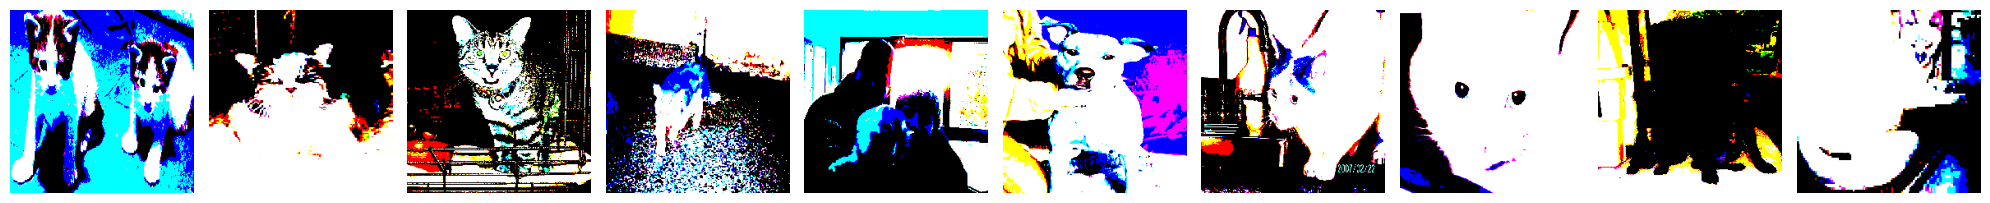

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [ ]:
plotImages(imgs)
print(labels)

## Build and train a CNN

In [ ]:
model = Sequential(
    [
        Conv2D(
            filters=32,
            kernel_size=(3, 3),
            activation="relu",
            padding="same",
            input_shape=(224, 224, 3),
        ),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        Flatten(),
        Dense(units=2, activation="softmax"),
    ]
)

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 200704)            0         
                                                                 
 dense_8 (Dense)             (None, 2)                

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# TAG: MODELFIT
from tensorflow.keras.models import load_model

if model2.already_exist_model():
    model = load_model(model2.get_load_model())
else:
    if model2.is_trainable():
        model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)
    if model2.is_overwriteable():
        model.save(os.path.join(model2.get_load_location(), model2.get_model_name()))

### val_accuracy < training_accuracy => Overfitting !

## Predict

In [ ]:
test_imgs, test_labels = next(test_batches)

In [ ]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
predictions = model.predict(x=test_batches, verbose=0)

In [ ]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

Confusion matrix, without normalization
[[37 13]
 [19 31]]


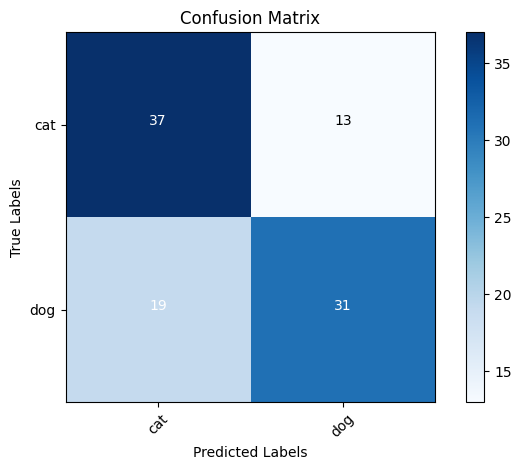

In [ ]:
cm_plot_labels = ["cat", "dog"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

## Build Fine-tuned VGG16 model

In [ ]:
# Download modle - Internet conenction require
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
def count_params(model):
    non_trainable_params = np.sum(
        [np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights]
    )
    trainable_params = np.sum(
        [np.prod(v.get_shape().as_list()) for v in model.trainable_weights]
    )
    return {
        "non_trainable_params": non_trainable_params,
        "trainable_params": trainable_params,
    }

In [ ]:
params = count_params(vgg16_model)
assert params["non_trainable_params"] == 0, "We have some non-trainable params!"
assert params["trainable_params"] == 138357544, "It is not VGG16 model!"

In [ ]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
params = count_params(model)
assert params["non_trainable_params"] == 0, "We have some non-trainable params!"
assert params["trainable_params"] == 134260544, "This need to add hidden layers (not include output layer)!"

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
model.add(Dense(units=2, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
params = count_params(model)
assert params["non_trainable_params"] == 134260544
assert params["trainable_params"] == 8194

## Train the fine-tuned VGG16 model

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["Accuracy"])

In [ ]:
# TAG: MODELFIT
from tensorflow.keras.models import load_model

if model3.already_exist_model():
    model = load_model(model3.get_load_model())
else:
    if model3.is_trainable():
        model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2)
    if model3.is_overwriteable():
        model.save(os.path.join(model3.get_load_location(), model3.get_model_name()))

## Predict using fine-tuned VGG16 model

In [ ]:
predictions = model.predict(x=test_batches, verbose=0)

In [ ]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [ ]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[48  2]
 [ 1 49]]


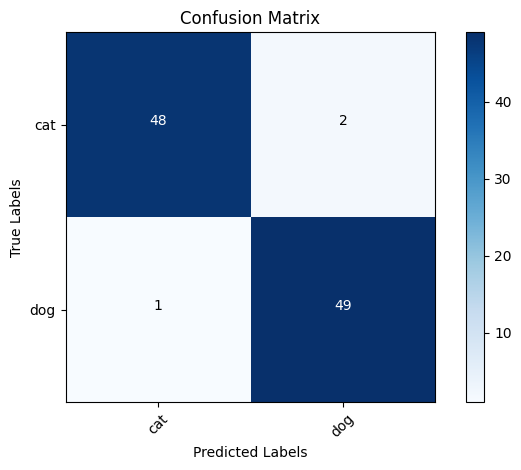

In [ ]:
cm_plot_labels = ["cat", "dog"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

In [ ]:
print("Accuracy: ", str((cm[0][0] + cm[1][1]) / cm.sum()))

Accuracy:  0.97


## MobileNet

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

os.chdir("D:\DATA SCIENCE\GIT\DS\Keras_Tutorial")

In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [ ]:
IMAGE_FILE_NAME = "sample_image"
IMAGE_FILE_EXTENSION = "jpeg"
IMAGE_FILE = IMAGE_FILE_NAME + "." + IMAGE_FILE_EXTENSION

def prepare_image(file):
    img_path = os.path.join(os.getcwd(), IMAGE_FILE)
    img = image.image_utils.load_img(img_path, target_size=(224,224))
    img_array = image.image_utils.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

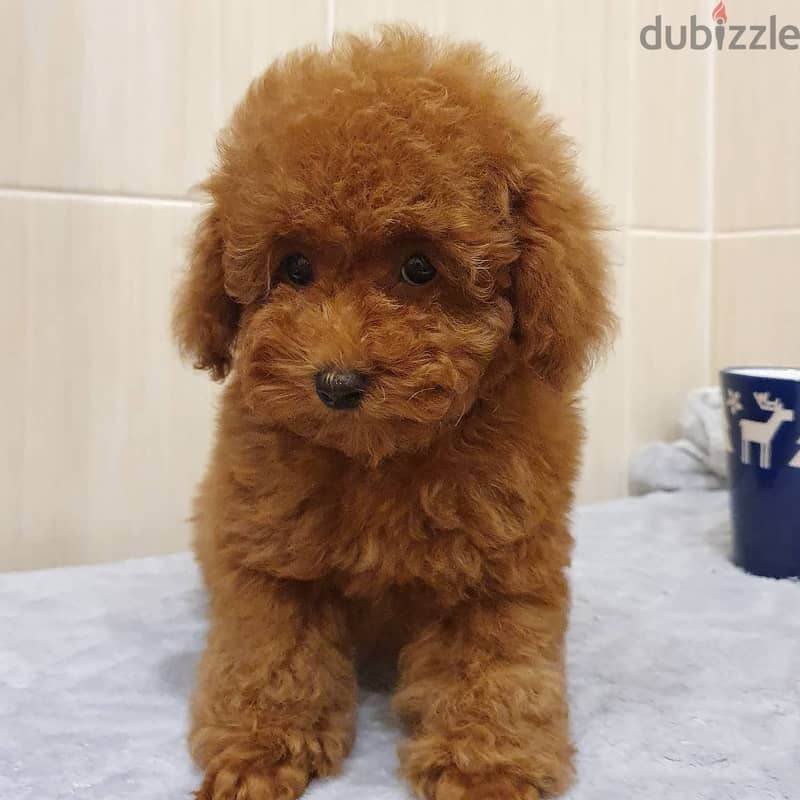

In [ ]:
from IPython.display import Image

Image(filename=os.path.join(os.getcwd(), IMAGE_FILE), width=300, height=200)

In [ ]:
preprocessed_image = prepare_image(IMAGE_FILE)
predictions = mobile.predict(preprocessed_image)
result = imagenet_utils.decode_predictions(predictions)

1/1 [==============================] - 0s 264ms/step


In [ ]:
result

[[('n02113624', 'toy_poodle', 0.89769),
  ('n02113712', 'miniature_poodle', 0.09973848),
  ('n02113799', 'standard_poodle', 0.0024287386),
  ('n02112137', 'chow', 4.616278e-05),
  ('n04399382', 'teddy', 4.111386e-05)]]

## Fine-tune MobileNet model on sign language digits

### Image prepraration

In [ ]:
DATA_DIRECTORY = "D:\DATA SCIENCE\CLOUD\DATASETS\sign_language_digits\SANDBOX"
DATA_DIRECTORY

'D:\\DATA SCIENCE\\CLOUD\\DATASETS\\sign_language_digits\\SANDBOX'

In [ ]:
os.chdir(DATA_DIRECTORY)
if os.path.isdir("train/0/") is False:
    os.mkdir("train")
    os.mkdir("valid")
    os.mkdir("test")

    for i in range(0, 10):
        shutil.move(f"{i}", "train")
        os.mkdir(f"valid/{i}")
        os.mkdir(f"test/{i}")

        valid_samples = random.sample(os.listdir(f"train/{i}"), 30)
        for j in valid_samples:
            shutil.move(f"train/{i}/{j}", f"valid/{i}")

        test_samples = random.sample(os.listdir(f"train/{i}"), 5)
        for k in test_samples:
            shutil.move(f"train/{i}/{k}", f"test/{i}")

os.chdir(CURRENT_DIRECTORY)

In [ ]:
TRAIN_PATH = os.path.join(DATA_DIRECTORY, "train")
VALID_PATH = os.path.join(DATA_DIRECTORY, "valid")
TEST_PATH = os.path.join(DATA_DIRECTORY, "test")

In [ ]:
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input
).flow_from_directory(directory=TRAIN_PATH, target_size=(224, 224), batch_size=10)

valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input
).flow_from_directory(directory=VALID_PATH, target_size=(224, 224), batch_size=10)

test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input
).flow_from_directory(directory=TEST_PATH, target_size=(224, 224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


### Modify Model

In [380]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [381]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [382]:
params = count_params(mobile)
params

{'non_trainable_params': 21888, 'trainable_params': 4231976}

In [383]:
x = mobile.layers[-1].output
output = Dense(units=10, activation="softmax")(x)

In [384]:
x

<KerasTensor: shape=(None, 1000) dtype=float32 (created by layer 'predictions')>

In [385]:
output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_19')>

In [386]:
len(mobile.layers)

91

In [387]:
model = Model(inputs=mobile.input, outputs=output)

In [388]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [389]:
len(model.layers)

92

In [390]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [391]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

### Train the model

In [392]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [393]:
# TAG: MODELFIT
from tensorflow.keras.models import load_model

if model4.already_exist_model():
    model = load_model(model4.get_load_model())
else:
    if model4.is_trainable():
        model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)
    if model4.is_overwriteable():
        model.save(os.path.join(model4.get_load_location(), model4.get_model_name()))

Epoch 1/10


172/172 - 24s - loss: 2.2573 - accuracy: 0.4258 - val_loss: 2.2365 - val_accuracy: 0.4500 - 24s/epoch - 141ms/step
Epoch 2/10
172/172 - 22s - loss: 2.2134 - accuracy: 0.6151 - val_loss: 2.2028 - val_accuracy: 0.7000 - 22s/epoch - 131ms/step
Epoch 3/10
172/172 - 23s - loss: 2.1875 - accuracy: 0.7009 - val_loss: 2.1813 - val_accuracy: 0.6733 - 23s/epoch - 136ms/step
Epoch 4/10
172/172 - 24s - loss: 2.1653 - accuracy: 0.6968 - val_loss: 2.1573 - val_accuracy: 0.6800 - 24s/epoch - 138ms/step
Epoch 5/10


KeyboardInterrupt: 